In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.ensemble import RandomForestRegressor

In [371]:
trainData=pd.read_csv("C:\\Users\\LAKSHMI\\Desktop\\dsp project\\train11.csv")
testData=pd.read_csv("C:\\Users\\LAKSHMI\\Desktop\\dsp project\\test11.csv")

In [372]:
trainData

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [373]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [374]:
num_col=trainData.select_dtypes(exclude=["object"]).columns
cat_col=trainData.select_dtypes(include=["object"]).columns

In [375]:
num_col


Index(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue'],
      dtype='object')

In [376]:
cat_col

Index(['Open Date', 'City', 'City Group', 'Type'], dtype='object')

In [377]:
testData.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


# MARKDOWN

In [378]:
trainData.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [379]:
trainData['Date'] = pd.to_datetime(trainData['Open Date'],format="%m/%d/%Y")
trainData['Opendays']=pd.to_datetime('25-09-2022')- trainData['Date-']
trainData

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,revenue,Date,Opendays
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3,4,5,5,4,3,4,5653753.0,1999-07-17,8471 days
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,6923131.0,2008-02-14,5337 days
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,2055379.0,2013-03-09,3487 days
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,12,10,6,18,12,12,6,2675511.0,2012-02-02,3888 days
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,1,3,2,3,4,3,3,4316715.0,2009-05-09,4887 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,0,0,0,0,0,0,0,5787594.0,2008-06-25,5205 days
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,0,0,0,0,0,0,0,9262754.0,2006-10-12,5827 days
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,0,2544857.0,2006-07-08,5923 days
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,0,0,0,0,0,0,0,7217634.0,2010-10-29,4349 days


In [380]:
trainData["City Group"].value_counts()

Big Cities    78
Other         59
Name: City Group, dtype: int64

# comparing the revenues of big cities  and other cities

<AxesSubplot:xlabel='City Group', ylabel='revenue'>

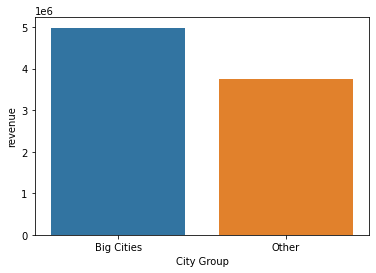

In [381]:
cityPerc=trainData[['City Group','revenue']].groupby(['City Group'],as_index=False).mean()
sns.barplot(x="City Group",y="revenue",data=cityPerc)

# sorting the cities by revenue;getting the max earned cities

<AxesSubplot:xlabel='City', ylabel='revenue'>

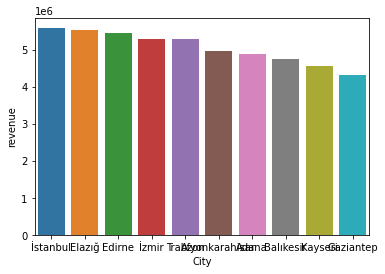

In [382]:
cityPerc=trainData[["City","revenue"]].groupby(['City'],as_index=False).mean()
newDF=cityPerc.sort_values(["revenue"],ascending=False)
sns.barplot(x="City",y="revenue",data=newDF.head(10))


<AxesSubplot:xlabel='City', ylabel='revenue'>

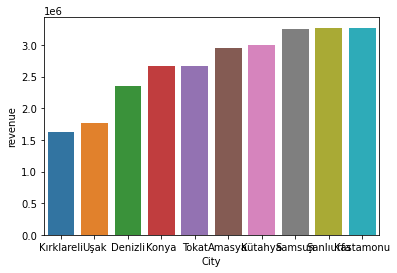

In [383]:
cityPerc=trainData[["City","revenue"]].groupby(['City'],as_index=False).mean()
newDF=cityPerc.sort_values(["revenue"])
sns.barplot(x="City",y="revenue",data=newDF.head(10))

# working days

In [384]:
trainData

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,revenue,Date,Opendays
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3,4,5,5,4,3,4,5653753.0,1999-07-17,8471 days
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,6923131.0,2008-02-14,5337 days
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,2055379.0,2013-03-09,3487 days
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,12,10,6,18,12,12,6,2675511.0,2012-02-02,3888 days
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,1,3,2,3,4,3,3,4316715.0,2009-05-09,4887 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,0,0,0,0,0,0,0,5787594.0,2008-06-25,5205 days
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,0,0,0,0,0,0,0,9262754.0,2006-10-12,5827 days
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,0,2544857.0,2006-07-08,5923 days
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,0,0,0,0,0,0,0,7217634.0,2010-10-29,4349 days


In [385]:
correlation=trainData.corr()
correlation

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,1.000000,-0.026351,-0.036991,-0.025033,-0.001914,0.010108,-0.025953,-0.080977,-0.052129,-0.068655,...,-0.041989,0.075148,-0.019252,0.055963,-0.019958,0.067714,0.003073,0.040799,-0.065791,-0.006277
P1,-0.026351,1.000000,0.836671,0.695928,0.677941,0.302820,0.747296,0.853753,0.760820,0.765743,...,0.586532,0.487589,0.479175,0.552593,0.329795,0.570835,0.449182,0.554951,0.277601,0.070217
P2,-0.036991,0.836671,1.000000,0.473551,0.540322,0.203003,0.673106,0.769842,0.505116,0.481635,...,0.322511,0.342005,0.353477,0.389376,0.234991,0.394319,0.314798,0.387938,0.161162,0.191518
P3,-0.025033,0.695928,0.473551,1.000000,0.443606,0.168891,0.570486,0.651489,0.689173,0.741967,...,0.571525,0.473089,0.406701,0.463217,0.312269,0.501575,0.428504,0.484942,0.284065,-0.024613
P4,-0.001914,0.677941,0.540322,0.443606,1.000000,0.715406,0.595724,0.700482,0.654594,0.675336,...,0.452364,0.387747,0.333626,0.440795,0.182820,0.434245,0.277902,0.411664,0.177916,0.035685
P5,0.010108,0.302820,0.203003,0.168891,0.715406,1.000000,0.326524,0.446154,0.447577,0.465662,...,0.306904,0.244032,0.112603,0.215568,0.071079,0.243040,0.173309,0.193652,0.033548,-0.028191
P6,-0.025953,0.747296,0.673106,0.570486,0.595724,0.326524,1.000000,0.738388,0.720144,0.676323,...,0.563415,0.460618,0.477593,0.519243,0.300611,0.519635,0.413645,0.524552,0.327594,0.139094
P7,-0.080977,0.853753,0.769842,0.651489,0.700482,0.446154,0.738388,1.000000,0.751196,0.775003,...,0.584071,0.509213,0.452471,0.531011,0.339178,0.562561,0.457721,0.543563,0.309678,0.051165
P8,-0.052129,0.760820,0.505116,0.689173,0.654594,0.447577,0.720144,0.751196,1.000000,0.919956,...,0.754736,0.454937,0.420425,0.516617,0.256416,0.524474,0.405709,0.499777,0.308294,-0.084215
P9,-0.068655,0.765743,0.481635,0.741967,0.675336,0.465662,0.676323,0.775003,0.919956,1.000000,...,0.789784,0.502670,0.467334,0.544749,0.326869,0.582042,0.467916,0.551953,0.330927,-0.050352


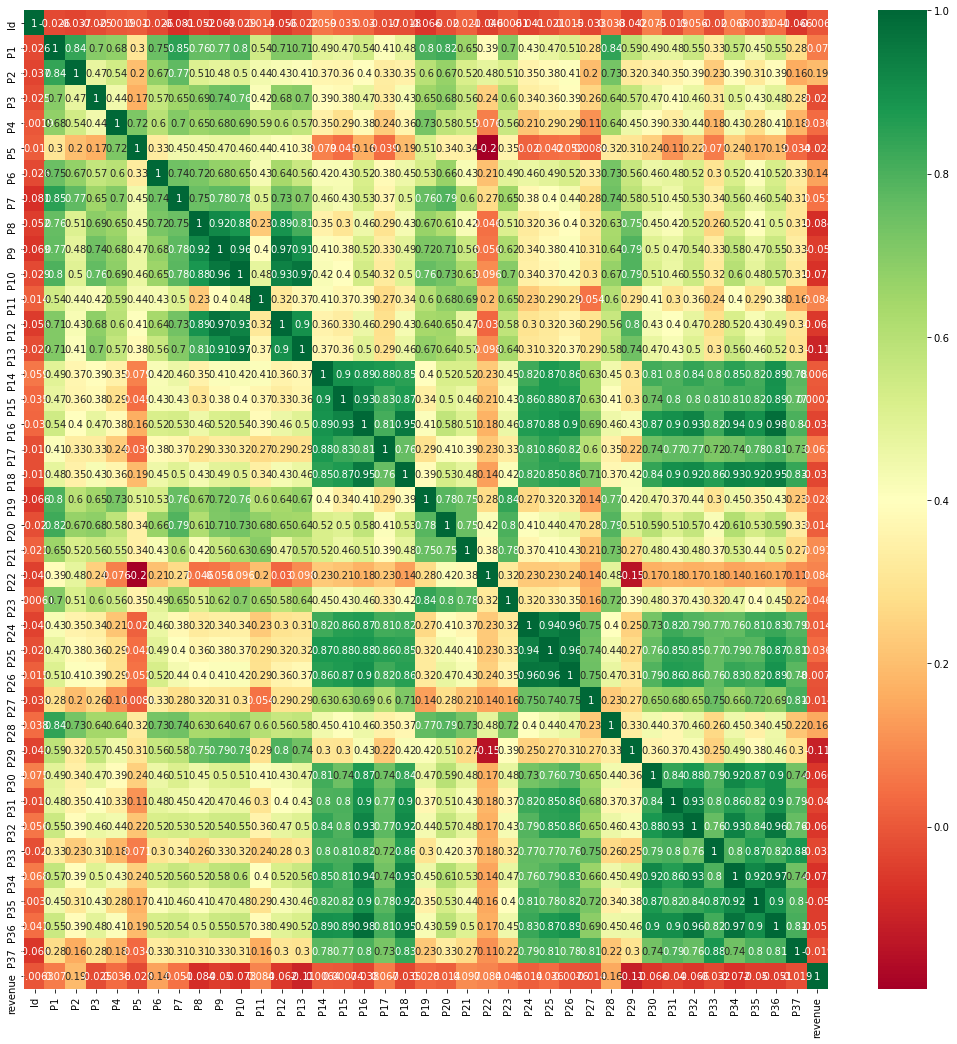

In [386]:
plt.figure(figsize=(18,18))
sns.heatmap(trainData.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [387]:
correlation['revenue'].sort_values(ascending=False)

revenue    1.000000
P2         0.191518
P28        0.155534
P6         0.139094
P21        0.097411
P11        0.084247
P22        0.083562
P1         0.070217
P17        0.067137
P7         0.051165
P23        0.045507
P25        0.036365
P4         0.035685
P19        0.027984
P24        0.014222
P20        0.014147
P14        0.006441
P15        0.000742
Id        -0.006277
P26       -0.007650
P27       -0.013680
P37       -0.019051
P3        -0.024613
P5        -0.028191
P33       -0.032426
P18       -0.034537
P16       -0.037997
P31       -0.040418
P35       -0.050156
P9        -0.050352
P36       -0.050534
P12       -0.062193
P32       -0.065857
P30       -0.066203
P34       -0.072343
P10       -0.073220
P8        -0.084215
P13       -0.105085
P29       -0.114846
Name: revenue, dtype: float64

In [388]:
trainData=trainData.drop(["Open Date","Id"],axis=1)

In [389]:
trainData.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P31,P32,P33,P34,P35,P36,P37,revenue,Date,Opendays
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,3,4,5,5,4,3,4,5653753.0,1999-07-17,8471 days
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,6923131.0,2008-02-14,5337 days
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,2055379.0,2013-03-09,3487 days
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,12,10,6,18,12,12,6,2675511.0,2012-02-02,3888 days
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,1,3,2,3,4,3,3,4316715.0,2009-05-09,4887 days


In [390]:
trainData["City Group"].value_counts()

Big Cities    78
Other         59
Name: City Group, dtype: int64

In [391]:
citygroup=pd.get_dummies(trainData['City Group'])
trainData= pd.concat([trainData,citygroup], axis = 1)

In [392]:
trainData.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P33,P34,P35,P36,P37,revenue,Date,Opendays,Big Cities,Other
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,5,5,4,3,4,5653753.0,1999-07-17,8471 days,1,0
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,6923131.0,2008-02-14,5337 days,1,0
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,2055379.0,2013-03-09,3487 days,0,1
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,6,18,12,12,6,2675511.0,2012-02-02,3888 days,0,1
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,2,3,4,3,3,4316715.0,2009-05-09,4887 days,0,1


In [393]:
trainData.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P33,P34,P35,P36,P37,revenue,Date,Opendays,Big Cities,Other
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,5,5,4,3,4,5653753.0,1999-07-17,8471 days,1,0
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,6923131.0,2008-02-14,5337 days,1,0
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,2055379.0,2013-03-09,3487 days,0,1
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,6,18,12,12,6,2675511.0,2012-02-02,3888 days,0,1
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,2,3,4,3,3,4316715.0,2009-05-09,4887 days,0,1


#  Data preprocessing for test data

In [394]:
testData['Date'] = pd.to_datetime(testData['Open Date'],format="%m/%d/%Y")
testData['Opendays']=pd.to_datetime('25-09-2022')- testData['Date']

citygroup=pd.get_dummies(testData['City Group'])
testData= pd.concat([testData,citygroup], axis = 1)




In [395]:
testData.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P32,P33,P34,P35,P36,P37,Date,Opendays,Big Cities,Other
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,0,0,0,0,0,0,2011-01-22,4264 days,0,1
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,2011-03-18,4209 days,0,1
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,2013-10-30,3252 days,1,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,0,0,0,0,0,0,2013-05-06,3429 days,0,1
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,0,0,0,0,0,0,2013-07-31,3343 days,0,1


In [396]:
trainData["Type"].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [397]:
type=pd.get_dummies(trainData['Type'])
trainData= pd.concat([trainData,type], axis = 1)



In [398]:
type=pd.get_dummies(testData['Type'])
testData= pd.concat([testData,type], axis = 1)


# Data preparation for model building


In [399]:
XTrain=trainData.loc[:,['P2','P28','P6','P21','P11','P22','P1','P17','P7','P23','P25','P4','P19','P24','P20','P14','P15']]
YTrain=trainData["revenue"]
XTest=testData.loc[:,['P2','P28','P6','P21','P11','P22','P1','P17','P7','P23','P25','P4','P19','P24','P20','P14','P15']]

In [400]:
XTrain

,P2,P28,P6,P21,P11,P22,P1,P17,P7,P23,P25,P4,P19,P24,P20,P14,P15
0,5.0,2.0,2,1,3,3,4,2,5,3,1,4.0,5,1,4,1,2
1,5.0,3.0,2,1,1,3,4,0,5,2,0,4.0,3,0,2,0,0
2,4.0,1.0,3,1,2,1,2,0,5,1,0,5.0,1,0,1,0,0
3,4.5,2.5,4,6,8,1,6,3,10,10,2,6.0,20,2,12,6,4
4,4.0,1.0,2,1,2,2,3,1,5,1,3,4.0,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,3.0,2.0,2,2,4,1,2,0,4,1,0,5.0,4,0,3,0,0
133,5.0,3.0,3,2,5,1,4,0,5,1,0,4.0,3,0,2,0,0
134,4.0,2.0,3,1,1,2,3,0,5,2,0,4.0,2,0,3,0,0
135,5.0,3.0,2,1,2,1,4,0,5,1,0,5.0,1,0,1,0,0


In [401]:
YTrain

0      5653753.0
1      6923131.0
2      2055379.0
3      2675511.0
4      4316715.0
         ...    
132    5787594.0
133    9262754.0
134    2544857.0
135    7217634.0
136    6363241.0
Name: revenue, Length: 137, dtype: float64

In [402]:
XTest

,P2,P28,P6,P21,P11,P22,P1,P17,P7,P23,P25,P4,P19,P24,P20,P14,P15
0,4.0,2.0,2,3,5,1,1,2,5,4,0,4.0,5,0,5,0,0
1,4.0,1.0,2,3,2,2,3,0,5,1,0,4.0,5,0,5,0,0
2,4.0,2.0,2,5,4,5,3,0,5,5,0,4.0,5,0,5,0,0
3,4.0,2.0,3,3,3,2,2,0,5,2,0,4.0,4,0,4,0,0
4,4.0,5.0,2,3,3,1,2,0,5,1,0,4.0,1,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5.0,2.0,2,1,4,3,5,0,5,2,0,4.0,3,0,1,0,0
99996,2.0,1.0,1,1,2,1,1,1,1,2,0,3.0,1,0,1,0,0
99997,5.0,4.0,2,4,5,5,4,3,5,5,4,4.0,3,4,5,0,4
99998,7.5,7.5,4,3,6,3,12,0,10,15,2,6.0,20,0,9,0,0


In [403]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(XTrain,YTrain)
linear_predictions=reg.predict(XTest)
linear_predictions

array([5863269.24654571, 3473997.74237344, 4222737.69040688, ...,
       5777594.23718724, 4727458.04624084, 3898228.05202456])

In [404]:
reg.score(XTrain,YTrain)

0.15400469126498506

In [405]:
forest=RandomForestRegressor(n_estimators=150)
forest.fit(XTrain,YTrain)

RandomForestRegressor(n_estimators=150)

In [406]:
pred=forest.predict(XTest)
pred=np.exp(pred)
scoreOfModel=forest.score(XTrain,YTrain)
print("score is calucalted as",scoreOfModel)

score is calucalted as 0.7575661553940829


<ipython-input-406-a2a543d971ae>:2: RuntimeWarning: overflow encountered in exp
  pred=np.exp(pred)


In [407]:
pred=forest.predict(XTest)
pred

array([4171878.08      , 3328808.48666667, 4406650.65333333, ...,
       4788505.76666667, 4208188.78      , 5299836.30677778])

In [408]:
trainData.columns

Index(['City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'revenue', 'Date', 'Opendays', 'Big Cities', 'Other', 'DT', 'FC', 'IL'],
      dtype='object')

In [409]:
def catFea(trainData):
  labelEncoding = LabelEncoder()
  trainData['City Group'] = labelEncoding.fit_transform(trainData['City Group'].astype('str'))
  trainData['Type'] = labelEncoding.fit_transform(trainData['Type'].astype('str'))
  return trainData


In [410]:
trainData

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P36,P37,revenue,Date,Opendays,Big Cities,Other,DT,FC,IL
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,3,4,5653753.0,1999-07-17,8471 days,1,0,0,0,1
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,6923131.0,2008-02-14,5337 days,1,0,0,1,0
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,2055379.0,2013-03-09,3487 days,0,1,0,0,1
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,12,6,2675511.0,2012-02-02,3888 days,0,1,0,0,1
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,3,3,4316715.0,2009-05-09,4887 days,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,...,0,0,5787594.0,2008-06-25,5205 days,0,1,0,1,0
133,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,...,0,0,9262754.0,2006-10-12,5827 days,1,0,0,1,0
134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,...,0,0,2544857.0,2006-07-08,5923 days,0,1,0,1,0
135,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,...,0,0,7217634.0,2010-10-29,4349 days,1,0,0,1,0


In [411]:
testData["City"].value_counts()

İstanbul          34087
Ankara             8720
İzmir              6465
Antalya            5911
Kocaeli            4364
Mersin             2735
Adana              2514
Balıkesir          2463
Bursa              2441
Muğla              1823
Aydın              1617
Tekirdağ           1577
Konya              1576
Gaziantep          1487
Edirne             1230
Manisa             1227
Çanakkale           965
Denizli             964
Diyarbakır          954
Hatay               951
Zonguldak           926
Eskişehir           900
Trabzon             660
Aksaray             650
Bolu                631
Yalova              630
Kırıkkale           622
Malatya             616
Mardin              610
Şanlıurfa           609
Batman              604
Sakarya             604
Rize                345
Artvin              344
Bilecik             339
Afyonkarahisar      331
Nevşehir            328
Sivas               326
Samsun              324
Kayseri             323
Erzincan            319
Kırşehir        

In [415]:
Xtrain=trainData.loc[:,['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
        'Big Cities','Other']]

In [416]:
Ytrain=trainData["revenue"]


In [417]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   P1          137 non-null    int64  
 1   P2          137 non-null    float64
 2   P3          137 non-null    float64
 3   P4          137 non-null    float64
 4   P5          137 non-null    int64  
 5   P6          137 non-null    int64  
 6   P7          137 non-null    int64  
 7   P8          137 non-null    int64  
 8   P9          137 non-null    int64  
 9   P10         137 non-null    int64  
 10  P11         137 non-null    int64  
 11  P12         137 non-null    int64  
 12  P13         137 non-null    float64
 13  P14         137 non-null    int64  
 14  P15         137 non-null    int64  
 15  P16         137 non-null    int64  
 16  P17         137 non-null    int64  
 17  P18         137 non-null    int64  
 18  P19         137 non-null    int64  
 19  P20         137 non-null    i

In [420]:
Xtest=testData.loc[:,['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
        'Big Cities','Other']]

In [421]:

from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(Xtrain,Ytrain)
linear_predictions=reg.predict(Xtest)
linear_predictions


array([5679838.64990154, 3621877.19769505, 2527414.6688631 , ...,
       6216590.68126422, 3855677.00382231, 6359974.50941574])

In [422]:
reg.score(Xtrain,Ytrain)

0.29121176019635997

In [423]:
forest=RandomForestRegressor(n_estimators=150)
forest.fit(Xtrain,Ytrain)

RandomForestRegressor(n_estimators=150)

In [424]:
pred=forest.predict(Xtest)
pred=np.exp(pred)
scoreOfModel=forest.score(Xtrain,Ytrain)
print("score is calucalted as",scoreOfModel)

score is calucalted as 0.7803457526385305


<ipython-input-424-adfc1c5b58d7>:2: RuntimeWarning: overflow encountered in exp
  pred=np.exp(pred)


In [425]:
pred=forest.predict(Xtest)
pred

array([4231587.36666667, 3220018.84666667, 4328197.05333333, ...,
       4370488.14666667, 4230332.11333333, 5935499.66333333])

In [426]:
import pickle
pickle.dump(forest,open('pipe.pkl','wb'))